In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahidnr","key":"41d53f2b5ab1412dd3a32a34ebc7f47e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d raingel/rice-leaf-disease

100% 2.47G/2.47G [02:07<00:00, 23.9MB/s]
100% 2.47G/2.47G [02:07<00:00, 20.8MB/s]


In [ ]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile,os
zip_lcl = '/content/rice-leaf-disease.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/tmp')
rzip.close()

In [ ]:
alllabel = [
    'BO',
    'MO',
    'NO_DISEASE'
]

In [ ]:
!mkdir /tmp/rice_leaf_disease

In [ ]:
import os
import shutil

# Path ke direktori tujuan
target_dir = '/tmp/rice_leaf_disease/'

# Membuat direktori tujuan jika belum ada
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Melakukan iterasi pada setiap label
for label in alllabel:
    # Path ke direktori sumber
    source_dir = f'/tmp/{label}/'

    # Memindahkan direktori ke direktori tujuan
    shutil.move(source_dir, target_dir)

    # Memberikan pesan keberhasilan
    print(f'{source_dir} berhasil dipindahkan ke {target_dir}')


/tmp/BO/ berhasil dipindahkan ke /tmp/rice_leaf_disease/
/tmp/MO/ berhasil dipindahkan ke /tmp/rice_leaf_disease/
/tmp/NO_DISEASE/ berhasil dipindahkan ke /tmp/rice_leaf_disease/


In [ ]:
dirbase = '/tmp/rice_leaf_disease/'

In [ ]:
import os
import random
import shutil

# Path ke direktori sumber
source_dir = dirbase

# Path ke direktori tujuan train
train_dir = dirbase+'train/'

# Path ke direktori tujuan validation
val_dir = dirbase+'val/'

# Daftar label
labels = [
    'BO',
    'MO',
    'NO_DISEASE'
]

# Rasio data train dan validation
train_ratio = 0.8
val_ratio = 0.2

# Membuat direktori train dan val jika belum ada
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# Melakukan iterasi pada setiap label
for label in labels:
    # Path ke direktori label
    label_dir = f'{source_dir}{label}/'

    # Path ke direktori train label
    train_label_dir = f'{train_dir}{label}/'

    # Path ke direktori val label
    val_label_dir = f'{val_dir}{label}/'

    # Membuat direktori train dan val label jika belum ada
    if not os.path.exists(train_label_dir):
        os.makedirs(train_label_dir)

    if not os.path.exists(val_label_dir):
        os.makedirs(val_label_dir)

    # Mendapatkan daftar nama file dalam direktori label
    filenames = os.listdir(label_dir)

    # Mengacak urutan file
    random.shuffle(filenames)

    # Menghitung jumlah data train dan val
    train_count = int(len(filenames) * train_ratio)
    val_count = len(filenames) - train_count

    # Memindahkan data train
    for i in range(train_count):
        src = f'{label_dir}{filenames[i]}'
        dst = f'{train_label_dir}{filenames[i]}'
        shutil.move(src, dst)

    # Memindahkan data val
    for i in range(train_count, train_count+val_count):
        src = f'{label_dir}{filenames[i]}'
        dst = f'{val_label_dir}{filenames[i]}'
        shutil.move(src, dst)

    # Memberikan pesan keberhasilan
    print(f'{label} berhasil dibagi menjadi data train dan val')


BO berhasil dibagi menjadi data train dan val
MO berhasil dibagi menjadi data train dan val
NO_DISEASE berhasil dibagi menjadi data train dan val


In [ ]:
dir_latih = os.path.join(dirbase, 'train')
dir_valid = os.path.join(dirbase, 'val')

In [ ]:
os.listdir(f'{train_dir}')

['BO', 'NO_DISEASE', 'MO']

In [ ]:
os.listdir(f'{val_dir}')

['BO', 'NO_DISEASE', 'MO']

In [ ]:
data_latih = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0)
data_valid = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.9,
    shear_range=0)

In [ ]:
generator_latih = data_latih.flow_from_directory(
    directory=dir_latih,
    target_size=(150,150),
    batch_size=50,
    subset='training',)
generator_valid = data_valid.flow_from_directory(
    directory=dir_valid,
    target_size=(150,150),
    batch_size=50,
    subset='validation')

Found 740 images belonging to 3 classes.
Found 167 images belonging to 3 classes.


In [ ]:
model = tensor.keras.models.Sequential([
  tensor.keras.layers.Conv2D(32,3,activation='relu',input_shape=(150,150,3)),
  tensor.keras.layers.MaxPooling2D(),
  tensor.keras.layers.Conv2D(64,3,activation='relu',kernel_regularizer='l2'),
  tensor.keras.layers.MaxPooling2D(),
  tensor.keras.layers.Conv2D(128,3,activation='relu',kernel_regularizer='l2'),
  tensor.keras.layers.MaxPooling2D(),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(256, activation='relu',kernel_regularizer='l2'),
  tensor.keras.layers.Dense(3, activation='softmax')
  ])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.build([150,150,3])

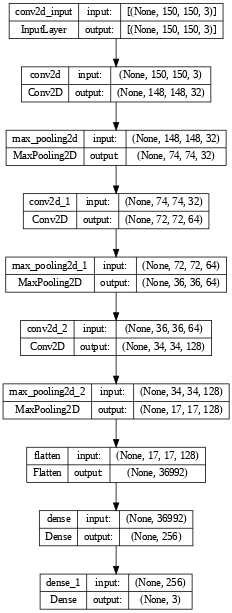

In [ ]:
model_viz = tensor.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=2,save_best_only=True)

In [ ]:
class myCallback(tensor.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.80):
      print("\nAkurasi di atas 80%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(
    generator_latih,
    #steps_per_epoch=25, # 634 images = batch_size * steps
    epochs=150,
    validation_data=generator_valid,
    #validation_steps=6, # 96 images = batch_size * steps
    verbose=2,
    callbacks=[callbacks])

Epoch 1/150
15/15 - 195s - loss: 4.0880 - accuracy: 0.5851 - val_loss: 2.2181 - val_accuracy: 0.7425 - 195s/epoch - 13s/step
Epoch 2/150
15/15 - 175s - loss: 1.9126 - accuracy: 0.7257 - val_loss: 1.3988 - val_accuracy: 0.7665 - 175s/epoch - 12s/step
Epoch 3/150
15/15 - 174s - loss: 1.2709 - accuracy: 0.7649 - val_loss: 1.0539 - val_accuracy: 0.7904 - 174s/epoch - 12s/step
Epoch 4/150
15/15 - 172s - loss: 1.0152 - accuracy: 0.8027 - val_loss: 0.8919 - val_accuracy: 0.7904 - 172s/epoch - 11s/step
Epoch 5/150

Akurasi di atas 80%, hentikan training!
15/15 - 172s - loss: 0.9479 - accuracy: 0.8027 - val_loss: 0.8033 - val_accuracy: 0.8144 - 172s/epoch - 11s/step


In [ ]:
model.save('model.h5')

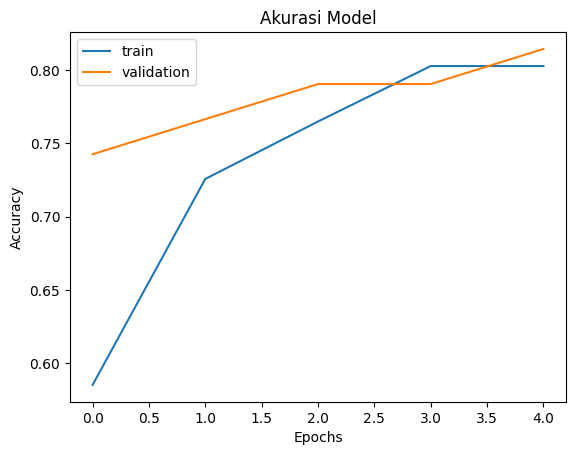

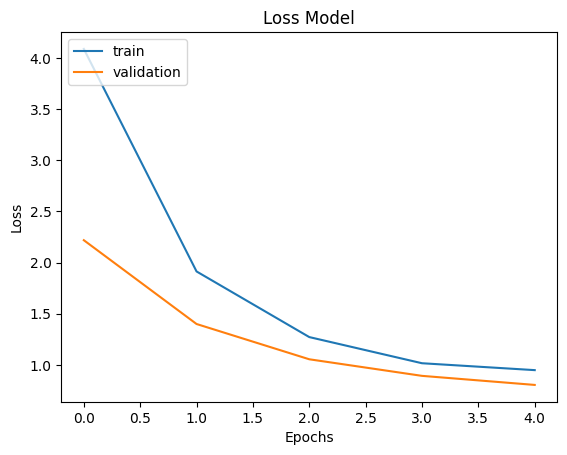

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()